Proceso de Exploratory Data Analysis (EDA)

En el contexto de nuestro proyecto de ciencia de datos, dedicamos especial atención a la etapa de Exploratory Data Analysis (EDA), un componente fundamental que nos permite comprender profundamente nuestros datos antes de proceder con el desarrollo de modelos predictivos o de aprendizaje automático. La EDA es un proceso iterativo que nos permite descubrir patrones, tendencias y relaciones ocultas en los datos, lo cual es esencial para el éxito de nuestro sistema de recomendación de películas.

Abordaremos varios pasos clave que nos permiten explorar nuestros datos de manera exhaustiva.

1. Entender nuestro objetivo de Analisis.
2. Revision inicial de los datos.
3. Describir estadisticamente los datos.
4. Visualizar los datos.
5. Detectar Outliers y Anomalias.
6. Explorar relaciones entre nuestras Variables.
7. Edentificar Patrones y Tendencias.
8. Formulamos Hipotesis basadas en nuestros hallazgos.

Al final de esta etapa, hemos adquirido una comprensión profunda de nuestros datos, lo cual nos posiciona favorablemente para el desarrollo de un sistema de recomendación de películas efectivo y preciso. La EDA ha sido un pilar fundamental en nuestro camino hacia el éxito de este proyecto, permitiéndonos identificar oportunidades y desafíos que han guiado el diseño y la implementación de nuestro modelo de recomendación.

Implementamos todas ls Librerias Necesarias

In [2]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [10]:
# Cargamos los Datasets que usaremos

peliculas = pd.read_parquet('DataSets_Clean/df_movies_limpio.parquet')
creditos = pd.read_parquet('DataSets_Clean/df_credits_limpio.parquet')
generos = pd.read_parquet('DataSets_Clean/df_genres_limpio.parquet')

 Realicemos una inspeccion Inicial de los Datos

In [4]:
print(peliculas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45376 non-null  float64
 1   id                 45376 non-null  float64
 2   original_language  45368 non-null  object 
 3   popularity         45377 non-null  object 
 4   release_date       45376 non-null  object 
 5   revenue            45379 non-null  float64
 6   title              45376 non-null  object 
 7   vote_average       45376 non-null  float64
 8   vote_count         45376 non-null  float64
 9   release_year       45376 non-null  float64
 10  return             45379 non-null  float64
dtypes: float64(7), object(4)
memory usage: 3.8+ MB
None


In [5]:
print(creditos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312606 entries, 0 to 312605
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           312606 non-null  int64  
 1   character    303903 non-null  object 
 2   cast_gender  312606 non-null  float64
 3   Actores      312606 non-null  object 
 4   department   312606 non-null  object 
 5   crew_gender  312606 non-null  float64
 6   job          312606 non-null  object 
 7   Diretores    312606 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 19.1+ MB
None


In [6]:
print(generos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93432 entries, 0 to 93431
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      91048 non-null  float64
 1   name    91048 non-null  object 
 2   0       0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 2.1+ MB
None


In [7]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

## Analisis Univariado

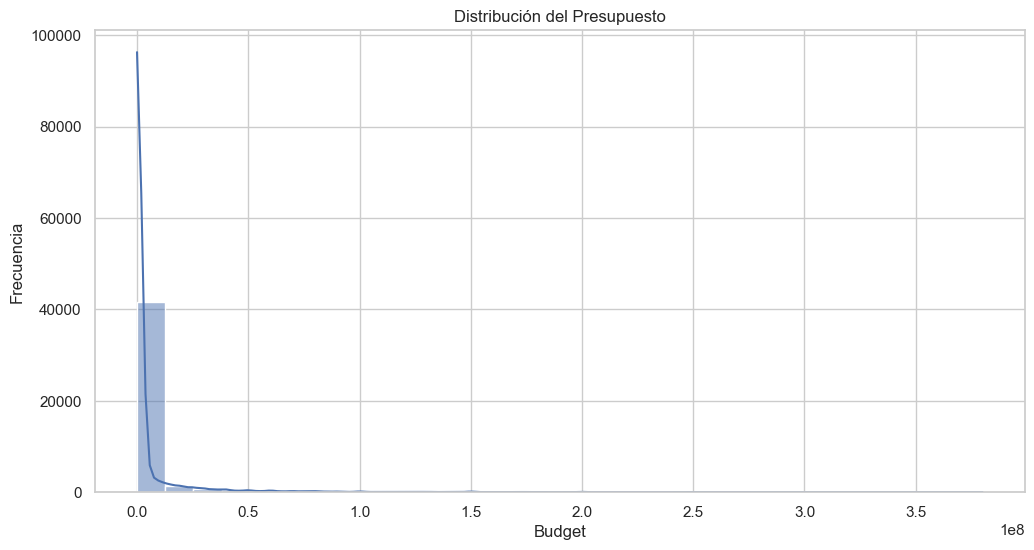

In [8]:
# Variables Numericas

# Histograma de presupuesto
plt.figure(figsize=(12, 6))
sns.histplot(peliculas['budget'], bins=30, kde=True)
plt.title('Distribución del Presupuesto')
plt.xlabel('Budget')
plt.ylabel('Frecuencia')
plt.show()

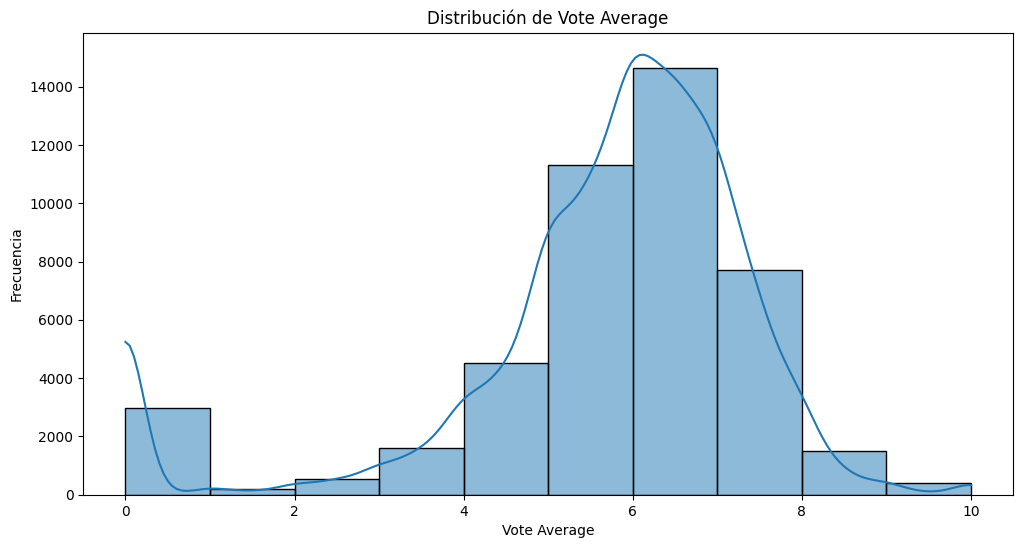

In [4]:
# Histograma de vote_average

peliculas = pd.read_parquet("DataSets_Clean\df_movies_limpio.parquet")

plt.figure(figsize=(12, 6))
sns.histplot(peliculas['vote_average'], bins=10, kde=True)
plt.title('Distribución de Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frecuencia')
plt.show()


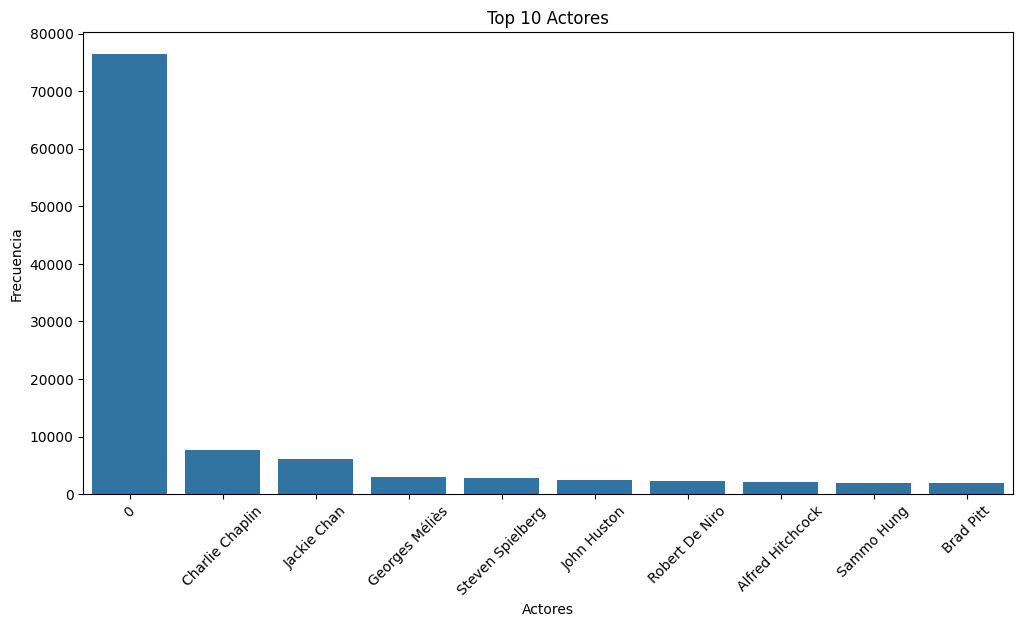

In [4]:
# Variables Categoricas

import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns

creditos = pd.read_parquet("DataSets_Clean\df_credits_limpio.parquet")

# Conteo de géneros
generos_count = creditos["Actores"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=generos_count.index, y=generos_count.values)
plt.title('Top 10 Actores')
plt.xlabel('Actores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Verificar valores nulos

print(creditos.isnull().sum())

id                0
character      8703
cast_gender       0
Actores           0
department        0
crew_gender       0
job               0
Diretores         0
dtype: int64


## Analisis Bivariado

Analizemos la relación entre las variables, especialmente entre el género y otras variables.

In [17]:
# Relación entre Género y Vote_Average de cada pelicula

# Primero necesitamos combinar los datasets para poder analizar

creditos = pd.read_parquet("DataSets_Clean\df_credits_limpio.parquet")
peliculas = pd.read_parquet("DataSets_Clean\df_movies_limpio.parquet")
generos = pd.read_parquet("DataSets_Clean\df_genres_limpio.parquet")

# Combinar datasets
peliculas_generos = peliculas.merge(creditos, on='id', how='left')
peliculas_generos = peliculas_generos.merge(generos, left_on='id', right_on='id', how='left')

# Verificamos el dataset combinado
print(peliculas_generos.head())


       budget     id original_language popularity release_date      revenue  \
0  30000000.0  862.0                en  21.946943   1995-10-30  373554033.0   
1  30000000.0  862.0                en  21.946943   1995-10-30  373554033.0   
2  30000000.0  862.0                en  21.946943   1995-10-30  373554033.0   
3  30000000.0  862.0                en  21.946943   1995-10-30  373554033.0   
4  30000000.0  862.0                en  21.946943   1995-10-30  373554033.0   

       title  vote_average  vote_count  release_year     return  \
0  Toy Story           7.7      5415.0        1995.0  12.451801   
1  Toy Story           7.7      5415.0        1995.0  12.451801   
2  Toy Story           7.7      5415.0        1995.0  12.451801   
3  Toy Story           7.7      5415.0        1995.0  12.451801   
4  Toy Story           7.7      5415.0        1995.0  12.451801   

                      character  cast_gender          Actores department  \
0            Dr. Martin Kessler          2.0  

In [18]:
# Comprobar valores nulos en vote_average
print(peliculas_generos['vote_average'].isnull().sum())

7152


In [20]:
# Antes de graficar, agruparemos los datos por género y calcular la media del vote_average para cada género. Esto ayudará a asegurarnos de que hay datos significativos para visualizar.

# Agrupar por género y calcular la media del vote_average

media_vote_por_genero = peliculas_generos.groupby('name')['vote_average'].mean().reset_index()
print(media_vote_por_genero)


                                name  vote_average
0                             Action           8.0
1                          Adventure           7.6
2                          Animation           7.7
3               Carousel Productions           7.0
4                             Comedy           6.9
5                              Crime           7.6
6                        Documentary           7.4
7                              Drama           7.3
8                             Family           6.9
9                            Fantasy           7.9
10                            Horror           5.1
11                             Music           5.4
12                           Mystery           6.1
13                           Romance           6.0
14                   Science Fiction           6.4
15                          TV Movie           5.9
16  Telescene Film Group Productions           5.1
17         Vision View Entertainment           7.6


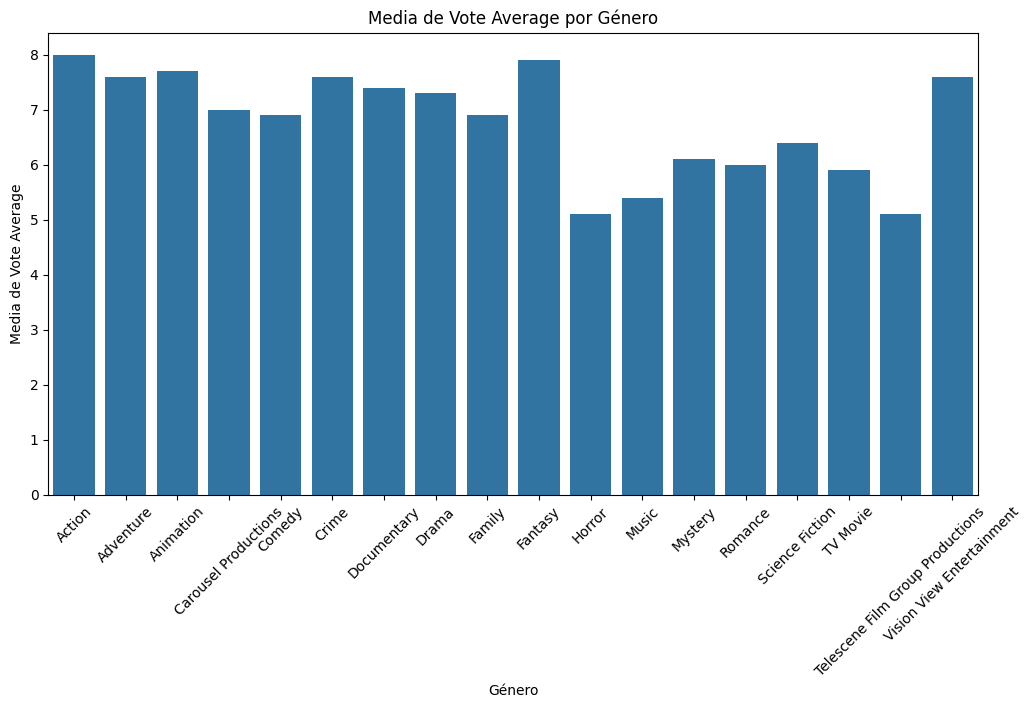

In [22]:
# Ahora si Visualizamos el Grafico

# Gráfico de barras para la media de vote_average por género
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='vote_average', data=media_vote_por_genero)
plt.title('Media de Vote Average por Género')
plt.xticks(rotation=45)
plt.ylabel('Media de Vote Average')
plt.xlabel('Género')
plt.show()

## Correlaciones

In [10]:
# Matriz de correlación

#Verificamos el tipo de dato del dataframe 
print(peliculas.dtypes)



budget               float64
id                   float64
original_language     object
popularity            object
release_date          object
revenue              float64
title                 object
vote_average         float64
vote_count           float64
release_year         float64
return               float64
dtype: object


In [13]:
# Convertir a numérico y manejar errores

peliculas['budget'] = pd.to_numeric(peliculas['budget'], errors='coerce')
peliculas['id'] = pd.to_numeric(peliculas['id'], errors='coerce')
peliculas['revenue'] = pd.to_numeric(peliculas['revenue'], errors='coerce')
peliculas['vote_average'] = pd.to_numeric(peliculas['vote_average'], errors='coerce')
peliculas['vote_count'] = pd.to_numeric(peliculas['vote_count'], errors='coerce')
peliculas['return'] = pd.to_numeric(peliculas['return'], errors='coerce')

# Repetir para otras columnas numéricas según sea necesario

In [14]:
# Seleccionar solo columnas numéricas

numerical_columns = peliculas.select_dtypes(include=['float64', 'int64'])
print(numerical_columns.columns)

Index(['budget', 'id', 'revenue', 'vote_average', 'vote_count', 'release_year',
       'return'],
      dtype='object')


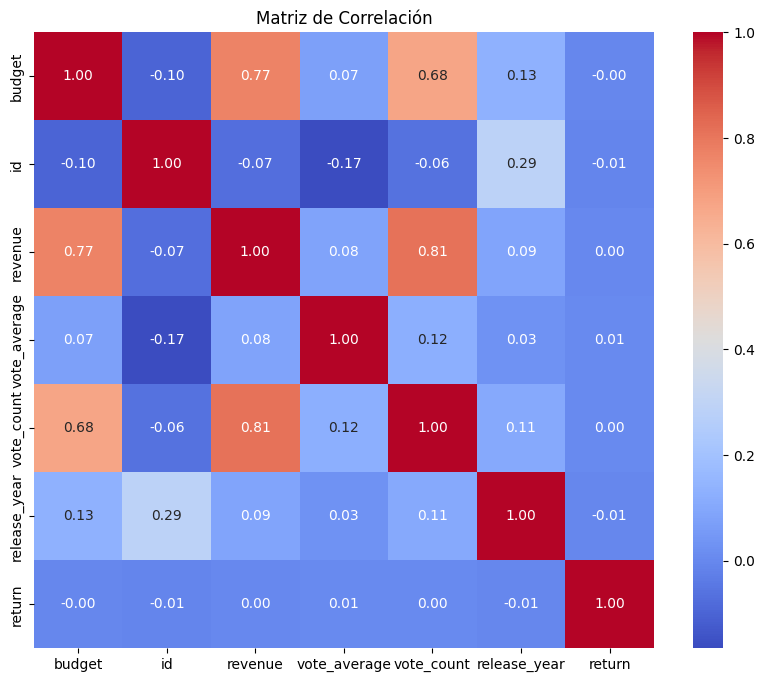

In [15]:
# Calcular la matriz de correlación
correlation_matrix = numerical_columns.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [16]:
# Verificar valores nulos en columnas numéricas
print(numerical_columns.isnull().sum())

budget          3
id              3
revenue         0
vote_average    3
vote_count      3
release_year    3
return          0
dtype: int64


## Tendencias Temporales

In [24]:
# Analisis de tendencias temporales, es una manera de entender cómo ciertas métricas cambian a lo largo del tiempo.

# Convertir la columna de fecha a tipo datetime, para asegurarnos de que tenga el formato adecuado
peliculas['release_date'] = pd.to_datetime(peliculas['release_date'])

In [25]:
# Agrupamos luego por fechas

# Extraer el año de la fecha
peliculas['year'] = peliculas['release_date'].dt.year

# Agrupar por año y calcular la media de vote_average
tendencias_anuales = peliculas.groupby('year')['vote_average'].mean().reset_index()


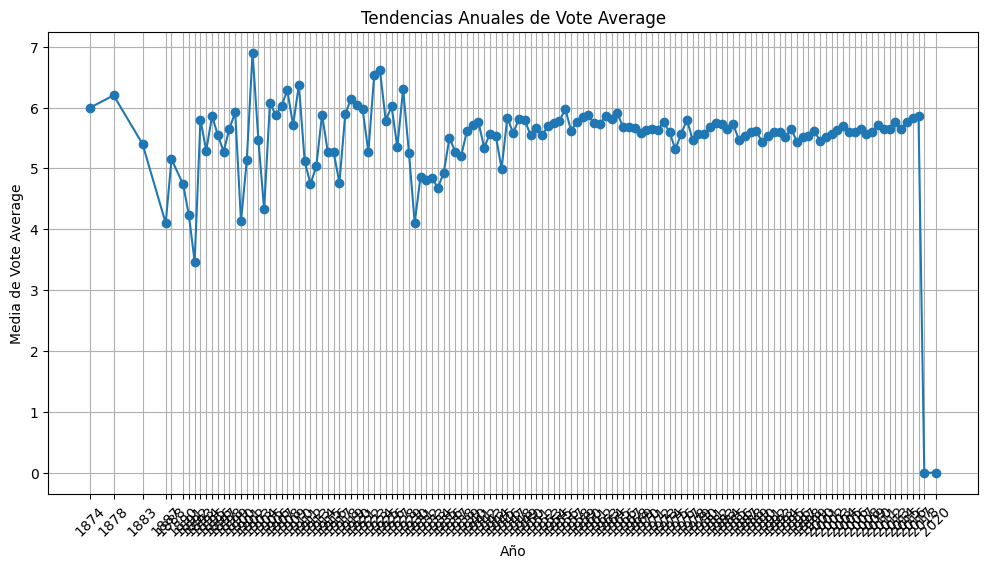

In [26]:
# Ahora si podemos visualizarlo

# Gráfico de líneas para tendencias anuales
plt.figure(figsize=(12, 6))
plt.plot(tendencias_anuales['year'], tendencias_anuales['vote_average'], marker='o')
plt.title('Tendencias Anuales de Vote Average')
plt.xlabel('Año')
plt.ylabel('Media de Vote Average')
plt.grid()
plt.xticks(tendencias_anuales['year'], rotation=45)
plt.show()

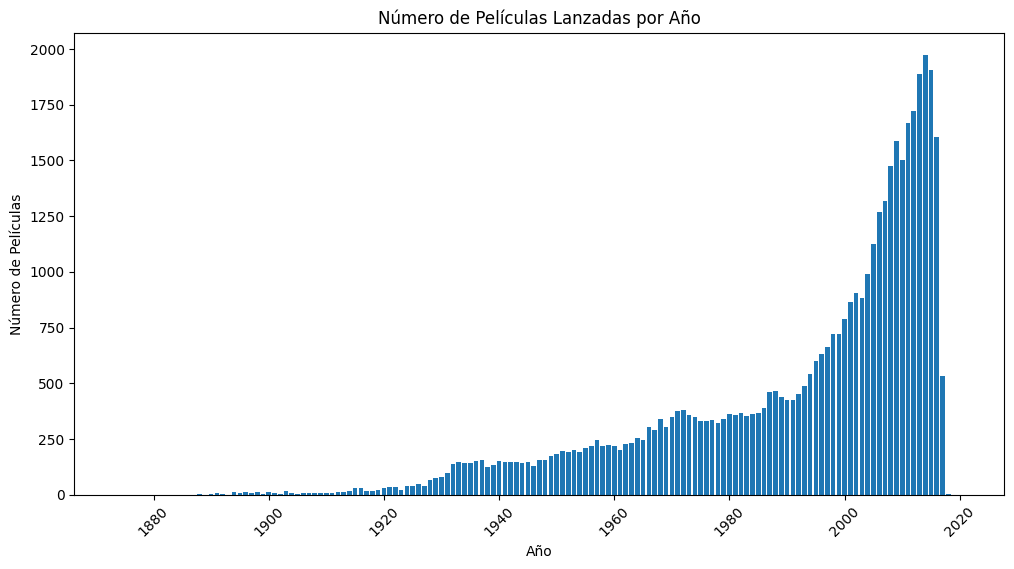

In [27]:
# Ahora quiero visualizar el numero de peliculas lanzadas por año

# Contar el número de películas por año
num_peliculas_anuales = peliculas.groupby('year').size().reset_index(name='num_peliculas')

# Visualizar el número de películas por año
plt.figure(figsize=(12, 6))
plt.bar(num_peliculas_anuales['year'], num_peliculas_anuales['num_peliculas'])
plt.title('Número de Películas Lanzadas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()

## Distribucion de Calificaciones

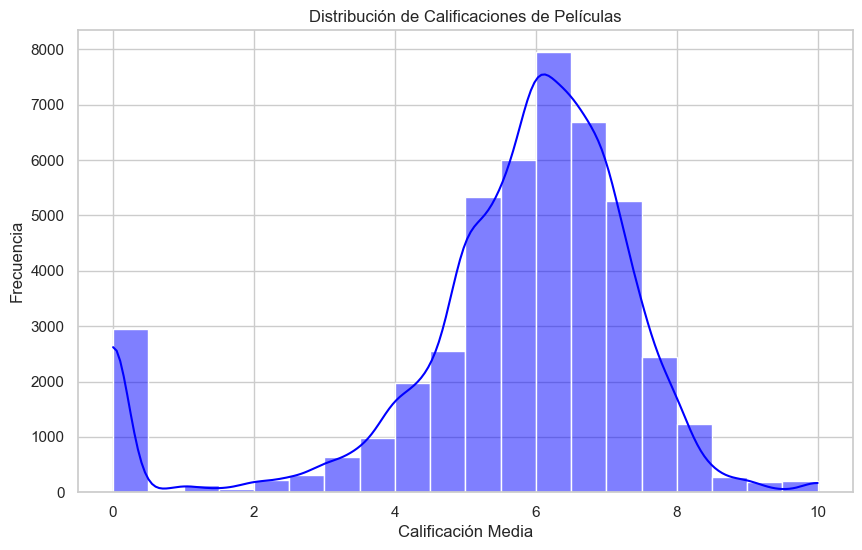

In [4]:
# Un histograma con una curva KDE para mostrar cómo se distribuyen las calificaciones de las películas.

plt.figure(figsize=(10, 6))
sns.histplot(peliculas['vote_average'], bins=20, kde=True, color='blue')
plt.title('Distribución de Calificaciones de Películas')
plt.xlabel('Calificación Media')
plt.ylabel('Frecuencia')
plt.show()

## Analisis de Generos

C:\Users\matencio\AppData\Local\Temp\ipykernel_19836\828072111.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genero_counts.index, y=genero_counts.values, palette="viridis")


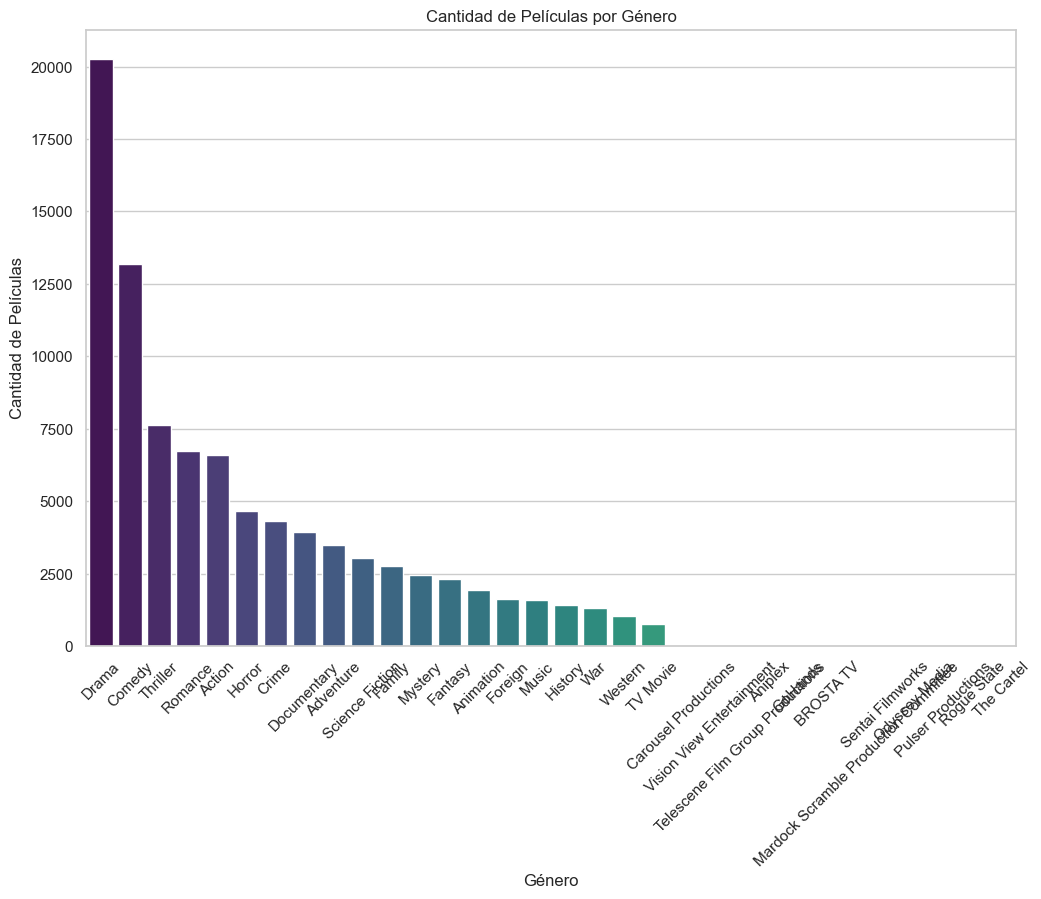

In [10]:
# Un gráfico de barras que muestra la cantidad de películas en cada género, ayudando a identificar qué géneros son más comunes.

plt.figure(figsize=(12, 8))
genero_counts = generos['name'].value_counts()
sns.barplot(x=genero_counts.index, y=genero_counts.values, palette="viridis")
plt.title('Cantidad de Películas por Género')
plt.xticks(rotation=45)
plt.xlabel('Género')
plt.ylabel('Cantidad de Películas')
plt.show()

## Mapa de Letras

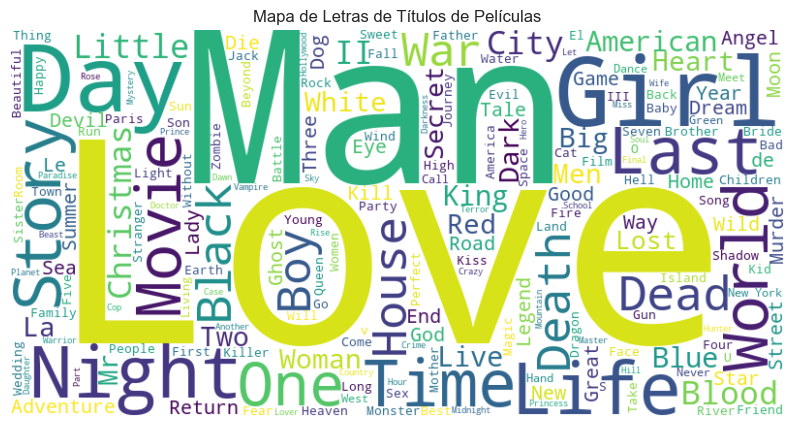

In [18]:
# Un gráfico de palabras que visualiza los títulos de las películas, permitiendo identificar títulos más comunes o populares.

plt.figure(figsize=(10, 6))
wordcloud_data = ' '.join(peliculas['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Letras de Títulos de Películas')
plt.show()

## Dispersion

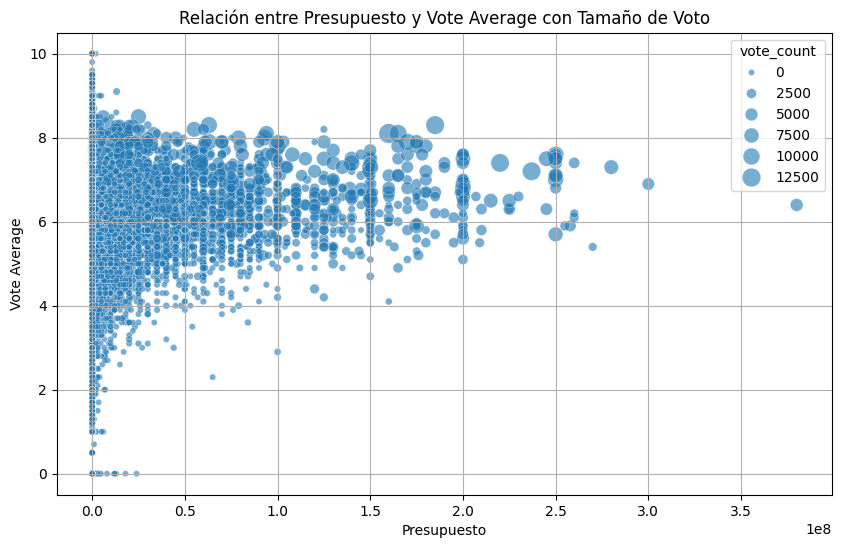

In [33]:
# Un gráfico de dispersión básico permite observar la relación entre dos variables cuantitativas.

# Gráfico de Dispersión con Tamaño,  Esto permite ver cómo la popularidad de las películas afecta su calificación.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=peliculas, x='budget', y='vote_average', size='vote_count', sizes=(20, 200), alpha=0.6)
plt.title('Relación entre Presupuesto y Vote Average con Tamaño de Voto')
plt.xlabel('Presupuesto')
plt.ylabel('Vote Average')
plt.grid()
plt.show()